In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
df = pd.read_csv("E:/Machine Learning/Personal Projects/California Housing Price Prediction/dataset/housing.csv")

In [59]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [61]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [62]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [63]:
df_shuffled = df.sample(n=len(df), random_state=1)
df_shuffled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0,<1H OCEAN
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0,INLAND
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0,NEAR BAY
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0,NEAR BAY
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,205300.0,<1H OCEAN
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,500001.0,<1H OCEAN
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,104800.0,<1H OCEAN
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,140700.0,INLAND


In [64]:
df_shuffled = df_shuffled.join(pd.get_dummies(df_shuffled['ocean_proximity']))

In [65]:
df_shuffled.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0,<1H OCEAN,True,False,False,False,False
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0,INLAND,False,True,False,False,False
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0,NEAR BAY,False,False,False,True,False
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0,NEAR BAY,False,False,False,True,False
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0,<1H OCEAN,True,False,False,False,False


In [66]:
df_shuffled.drop(columns=['ocean_proximity'],inplace=True,axis=0)

In [67]:
df_shuffled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0,True,False,False,False,False
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0,False,True,False,False,False
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0,False,False,False,True,False
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0,False,False,False,True,False
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,205300.0,True,False,False,False,False
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,500001.0,True,False,False,False,False
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,104800.0,True,False,False,False,False
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,140700.0,False,True,False,False,False


In [68]:
df_shuffled['total_bedrooms'].fillna(df_shuffled['total_bedrooms'].median(), inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_20492\1976789156.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_shuffled['total_bedrooms'].fillna(df_shuffled['total_bedrooms'].median(), inplace=True)


In [69]:
df_shuffled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20640 entries, 4712 to 235
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   <1H OCEAN           20640 non-null  bool   
 10  INLAND              20640 non-null  bool   
 11  ISLAND              20640 non-null  bool   
 12  NEAR BAY            20640 non-null  bool   
 13  NEAR OCEAN          20640 non-null  bool   
dtypes: bool(5), float64(9)
memory usage: 2.2 MB


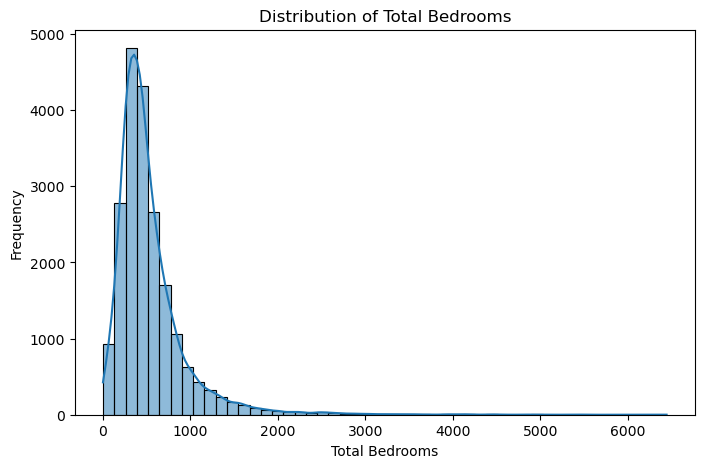

In [70]:
plt.figure(figsize=(8, 5))
sns.histplot(df_shuffled["total_bedrooms"], bins=50, kde=True)
plt.xlabel("Total Bedrooms")
plt.ylabel("Frequency")
plt.title("Distribution of Total Bedrooms")
plt.show()

In [71]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = ["housing_median_age", "total_rooms", "total_bedrooms", 
                   "population", "households", "median_income"]
df_shuffled[scaled_features] = scaler.fit_transform(df_shuffled[scaled_features])


In [72]:
df_shuffled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4712,-118.36,34.06,0.823227,0.079868,0.317518,-0.279466,0.325539,-0.326708,355000.0,True,False,False,False,False
2151,-119.78,36.78,0.664310,-0.206624,-0.195142,-0.249442,-0.160964,-0.996050,70700.0,False,True,False,False,False
15927,-122.42,37.73,1.379433,-0.374394,-0.300058,0.095832,-0.244663,0.075024,229400.0,False,False,False,True,False
82,-122.28,37.81,1.856182,-1.052348,-1.048779,-1.082161,-1.079042,-1.236920,112500.0,False,False,False,True,False
8161,-118.13,33.82,0.664310,-0.506868,-0.588578,-0.630921,-0.566383,0.688939,225400.0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,-0.924851,-0.397771,-0.149837,-0.305957,-0.166195,-1.099272,205300.0,True,False,False,False,False
17289,-119.63,34.42,1.061601,-0.399147,-0.652958,-0.593833,-0.626542,2.468780,500001.0,True,False,False,False,False
5192,-118.26,33.93,1.061601,-0.551331,-0.576656,-0.574406,-0.540227,-1.441260,104800.0,True,False,False,False,False
12172,-117.16,33.73,-1.481058,-0.116780,-0.197526,-0.090492,-0.058955,-0.651904,140700.0,False,True,False,False,False


In [73]:
from sklearn.model_selection import train_test_split

X = df_shuffled.drop("median_house_value", axis=1)
y = df_shuffled["median_house_value"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2_score = r2_score(y_test,y_pred)


In [75]:
print(r2_score)

0.6473144236453535
